In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install deepface

Note: you may need to restart the kernel to use updated packages.


In [3]:
from deepface import DeepFace

In [4]:
#implementation using python,opencv,deepface
import cv2
img=cv2.imread(r"C:\Users\Pravallika\OneDrive\Pictures\happyboy.jpg")


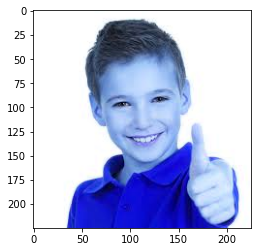

In [5]:
import matplotlib.pyplot as plt
plt.imshow(img)


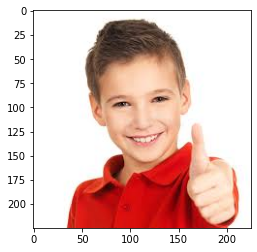

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [7]:
predictions=DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.16s/it]


In [8]:
predictions

[{'emotion': {'angry': 3.309897078640489e-08,
   'disgust': 2.7391443605494226e-11,
   'fear': 1.5320376078875597e-07,
   'happy': 99.9984622001648,
   'sad': 4.5461331921181625e-08,
   'surprise': 3.4626246758762136e-06,
   'neutral': 0.001533100294182077},
  'dominant_emotion': 'happy',
  'region': {'x': 58, 'y': 53, 'w': 107, 'h': 107},
  'face_confidence': 12.687342029239517,
  'age': 22,
  'gender': {'Woman': 13.832758367061615, 'Man': 86.16724610328674},
  'dominant_gender': 'Man',
  'race': {'asian': 0.004751507367473096,
   'indian': 0.07094774045981467,
   'black': 0.0002050057901215041,
   'white': 81.87616467475891,
   'middle eastern': 12.749972939491272,
   'latino hispanic': 5.297955870628357},
  'dominant_race': 'white'}]

In [9]:
data_list=predictions

In [10]:
data_dict = data_list[0]

In [11]:
type(data_dict)

dict

In [12]:
data_dict['dominant_emotion']

'happy'

In [13]:
##we r tryin to draw rectanglr over face 

In [14]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+r"C:\Users\Pravallika\Downloads\haarcascade_frontalface_default.xml")

In [15]:
import cv2

# Specify the absolute path to the XML file
xml_path = r"C:\Users\Pravallika\Downloads\haarcascade_frontalface_default.xml"

# Create CascadeClassifier object
faceCascade = cv2.CascadeClassifier(xml_path)

# Check if the cascade classifier is loaded successfully
if faceCascade.empty():
    print("Error: Cascade Classifier not loaded.")
else:
    # Read the image
    img = cv2.imread(r"C:\Users\Pravallika\OneDrive\Pictures\happyboy.jpg")

    # Check if the image is loaded successfully
    if img is None:
        print("Error: Image not loaded.")
    else:
        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = faceCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

        # Draw rectangles around the faces
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Display the result
        cv2.imshow("Detected Faces", img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


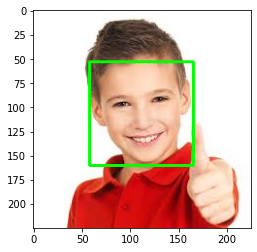

In [16]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


In [17]:
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,data_dict["dominant_emotion"],(0,50),font,1,(0,0,255),2,cv2.LINE_4);

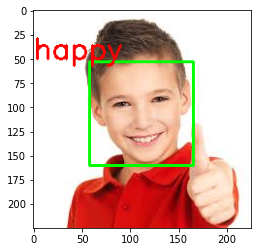

In [18]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
import cv2
from deepface import DeepFace

# Load the pre-trained face cascade
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start capturing video from the webcam
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    # Read a frame from the video stream
    ret, frame = cap.read()

    if not ret:
        print("Failed to capture frame")
        break

    # Perform face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    # Check if faces are detected
    if len(faces) > 0:
        # Analyze emotions using DeepFace only if faces are detected
        results = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
        
        # Extract dominant emotion from the first face (assuming there is only one face)
        dominant_emotion = results[0]['dominant_emotion']

        # Draw rectangles around detected faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Display the dominant emotion on the frame
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, dominant_emotion, (10, 50), font, 1, (0, 0, 255), 2, cv2.LINE_4)

    # Display the frame
    cv2.imshow('Demo video', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()
